Le programme notebook est séparé en plusieurs parties :    
-Les variables utiles et modifiables pour les programmes suivants      
-Les bibliothèques    
-Les fonctions avcec outil utilisé, définition et fonction    
-L'exécution des fonctions

# 1. Paramètres importants :

In [ ]:
''' Base de données des actions et de leurs corespondances
AAPL : Apple Inc.
AMZN : Amazon.com Inc.
MSFT : Microsoft Corp.
GOOGL : Alphabet Inc. (Google)
FB : Meta Platforms Inc. (Facebook)
SLB : Alphabet Inc. (Google) (Classe C)
'''

tickers = ['GTT', 'NYSE']  # Liste des actions à suivre
initial_investment = 1_000_000  # Montant investi en dollars (xxx_xxx_xxx)


# Pour la majorité des fonctions
start_date = '2020-01-01'   # Date de début de la période analysée (format YYYY-MM-DD)
end_date = '2025-01-01'     # Date de fin de la période analysée (format YYYY-MM-DD)

# Ratio de Sharpe 
risk_free_rate = 0.03  # 3% annuel

# Drawdown
nb_jours = 100              # Nombre de jours simulés
rendement_moyen = 0.001     # Rendement journalier moyen simulé
volatilite_simulee = 0.02   # Volatilité journalière simulée
prix_initial = 100          # Prix de départ du portefeuille
graine = 42                 # Pour reproduire les mêmes résultats

# VaR
z_score_95 = 1.65  # Pour une distribution normale

indice = '^GSPC'  # S&P 500. Peut être changé par '^FCHI' (CAC 40), etc.



## Bibliothèques :

[Stooq] Tick ers ignorés : {'GTT': 'Symbole introuvable sur Stooq (essayé: GTT, GTT.us)'}


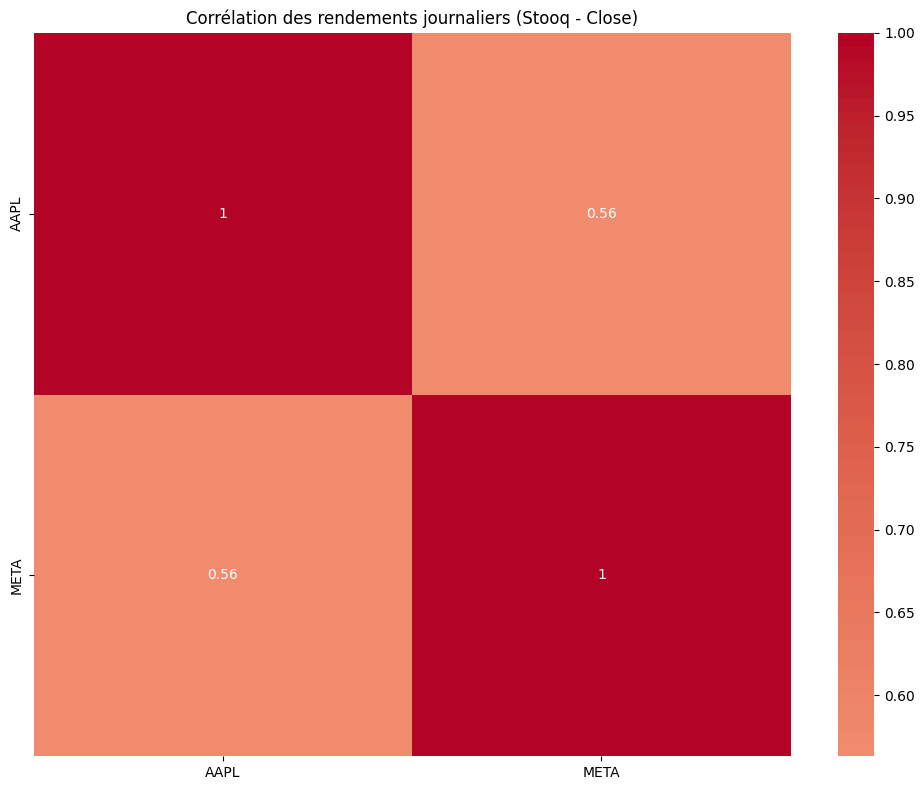

[Stooq] Tick ers ignorés : {'GTT': 'Symbole introuvable sur Stooq (essayé: GTT, GTT.us)'}


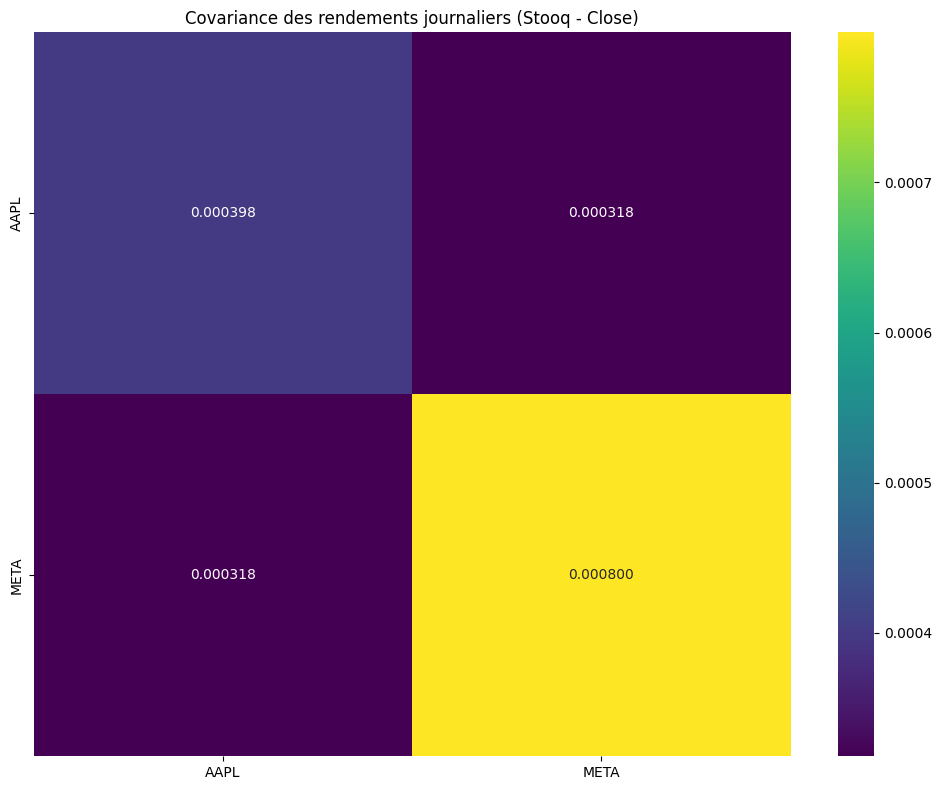

[Stooq] Tick ers ignorés : {'GTT': 'Symbole introuvable sur Stooq (essayé: GTT, GTT.us)'}


=== Value at Risk à 95% de confiance ===
      VaR Historique ($)  VaR Paramétrique ($)
AAPL            30129.44              31741.45
META            40197.75              45446.90


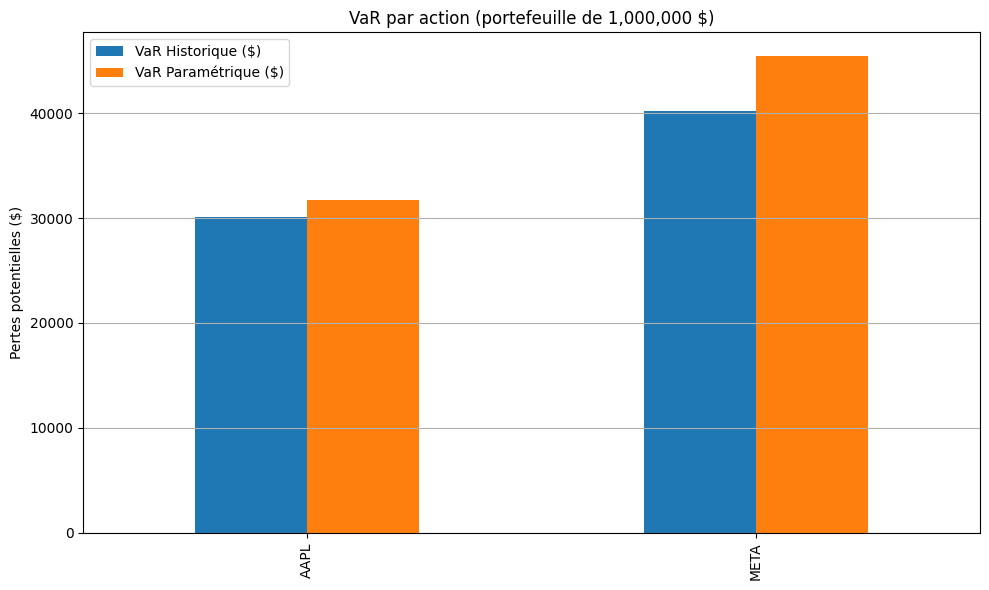

Volatilité annualisée de l’indice ^spx entre 2020-01-01 et 2025-01-01 : 21.43%


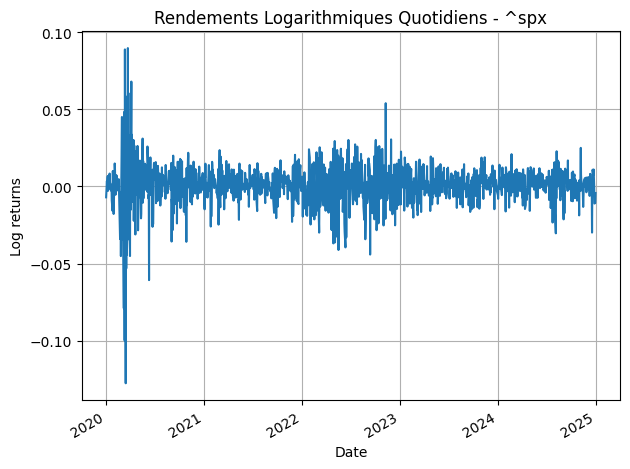

Volatilité annualisée de l’indice ^cac entre 2020-01-01 et 2025-01-01 : 20.57%


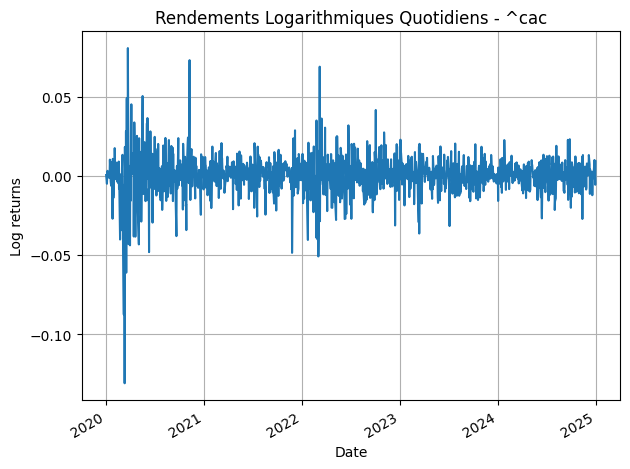

Volatilité annualisée de l’indice aapl.us entre 2020-01-01 et 2025-01-01 : 31.65%


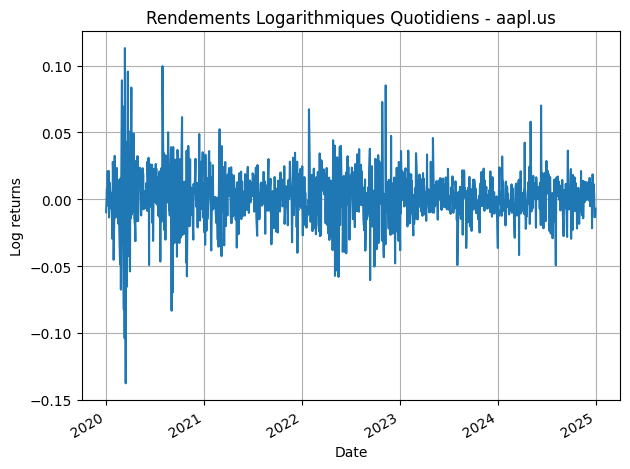

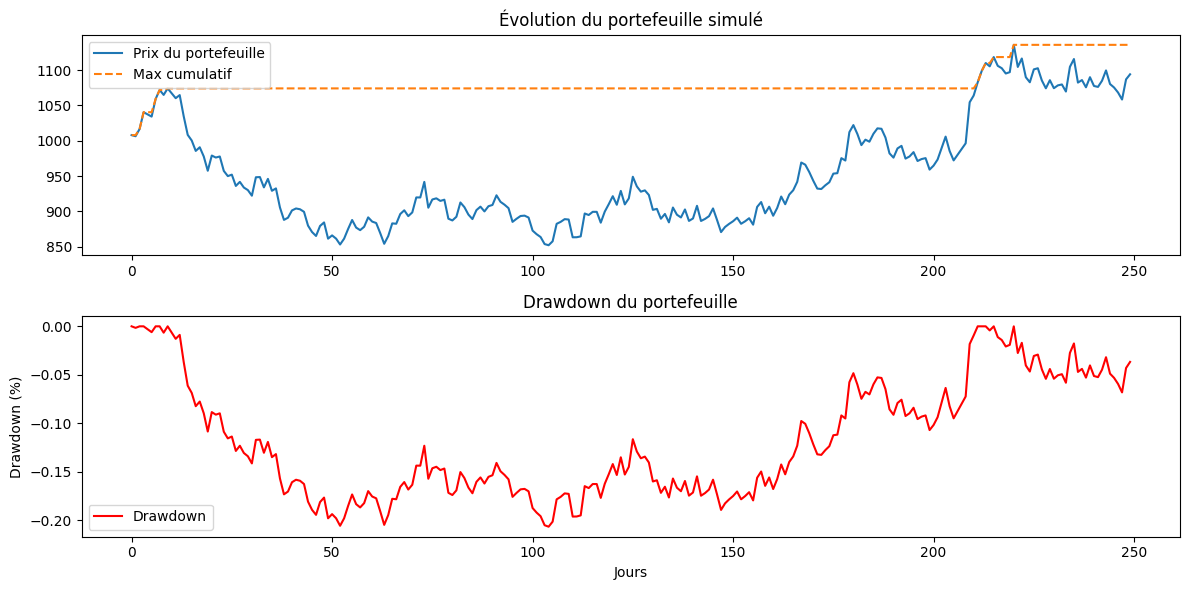

          Prix  Max cumulatif  Drawdown
0  1007.950712    1007.950712  0.000000
1  1006.364234    1007.950712 -0.001574
2  1016.644574    1016.644574  0.000000
3  1040.378597    1040.378597  0.000000
4  1037.244664    1040.378597 -0.003012


In [ ]:
calculer_betas(['aapl.us','msft.us'], '^spx', '2020-01-01', '2025-01-01')


             Bêta
aapl.us  1.173317
msft.us  1.173977


,Bêta
aapl.us,1.173317
msft.us,1.173977


=== Ratio de Sharpe (taux sans risque = 3.00%) ===
         Rendement annualisé  Volatilité annualisée  Sharpe Ratio
aapl.us               0.2979                 0.3168        0.8457
msft.us               0.2489                 0.3049        0.7180


,Rendement annualisé,Volatilité annualisée,Sharpe Ratio
aapl.us,0.2979,0.3168,0.8457
msft.us,0.2489,0.3049,0.7180


Corrélation moyenne simple du portefeuille : 0.7144


np.float64(0.7144477731609847)

In [29]:
def corr_moyenne_ponderee(tickers, start_date, end_date, weights=None):
    """
    Calcule la corrélation moyenne pondérée d'un portefeuille.
    
    - tickers : liste de tickers (ex: ['aapl.us','msft.us'])
    - start_date, end_date : période
    - weights : dict ou liste des poids (somme = 1). 
                Si None -> pondération égale.
    """
    if isinstance(tickers, str):
        tickers = [tickers]

    # 1. Téléchargement des prix via Stooq
    data = stooq_download(tickers, start=start_date, end=end_date)

    # 2. Extraction des prix de clôture
    if isinstance(data.columns, pd.MultiIndex):
        close_prices = data.xs('Close', axis=1, level=1)
    else:
        if 'Close' not in data.columns:
            raise KeyError("Les données téléchargées ne contiennent pas de colonne 'Close'.")
        close_prices = data[['Close']]
        close_prices.columns = [tickers[0]]

    # 3. Rendements
    returns = close_prices.pct_change().dropna(how="all")
    if returns.empty or returns.shape[1] < 2:
        raise ValueError("Il faut au moins 2 tickers valides pour calculer une corrélation pondérée.")

    # 4. Matrice de corrélation
    corr_matrix = returns.corr()

    # 5. Gestion des poids
    n = len(tickers)
    if weights is None:
        w = np.ones(n) / n
    else:
        if isinstance(weights, dict):
            w = np.array([weights.get(t, 0) for t in tickers])
        else:  # liste ou array
            w = np.array(weights)
        w = w / w.sum()  # normalisation

    # 6. Calcul de la moyenne pondérée
    total_weight = 0
    weighted_sum = 0
    for i in range(n):
        for j in range(i+1, n):
            weight_pair = w[i] * w[j]
            weighted_sum += corr_matrix.iloc[i, j] * weight_pair
            total_weight += weight_pair

    mean_corr_weighted = weighted_sum / total_weight if total_weight > 0 else np.nan

    # 7. Affichage
    print(f"Corrélation moyenne pondérée du portefeuille : {mean_corr_weighted:.4f}")

    return mean_corr_weighted


Corrélation moyenne pondérée du portefeuille : 0.7144
Corrélation moyenne pondérée du portefeuille : 0.7158
Corrélation moyenne pondérée du portefeuille : 0.7229


np.float64(0.7229001770618175)